# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Train Data

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE/Train/Customer_segmentation1.csv')

In [ ]:
train_df.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,RetentionPotential
0,1.0,0,0,0,1.0,2012,9,28,29,30,0,1,300,0,15.000000,1,0
1,1.0,1,1,1,0.0,2010,12,19,95,89,7,10,1096,1024,83.946237,186,1
2,1.0,0,0,0,6.0,2010,10,3,0,1,0,0,0,217,34.076923,13,2
3,3.0,0,0,0,1.0,2010,11,27,30,28,3,4,751,791,106.857143,7,1
4,1.0,1,1,0,0.0,2009,12,4,64,19,46,10,1504,848,69.117647,34,1


In [ ]:
train_df.columns

Index(['City', 'OnlineCommunication', 'AutomaticRefill', 'DoorstepDelivery',
       'PreferredDeliveryDay', 'DateOfRegistration_Year',
       'DateOfRegistration_Month', 'DateOfRegistration_Day',
       'EmailType_CustomizedEmail', 'MailOpened_yes', 'MailOpened_no',
       'MailClicked_yes', 'TimeDifference', 'Orders_TimeDifference',
       'OrderQuantity_mean', 'Orders_count', 'RetentionPotential'],
      dtype='object')

In [ ]:
train_df1 = train_df.drop('RetentionPotential', axis=1)

In [ ]:
y_true = train_df['RetentionPotential']

## K-Means Clustering

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

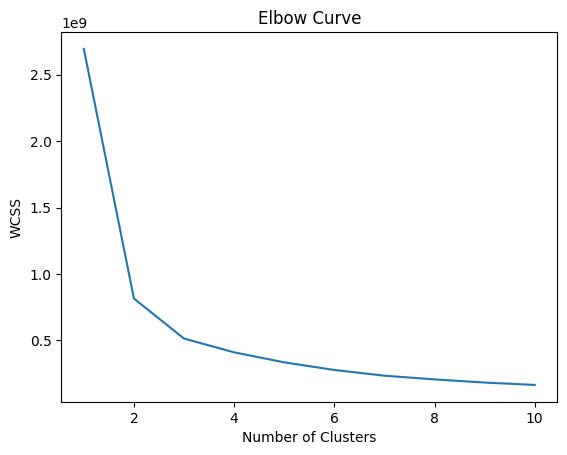

In [ ]:
# Determine optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(train_df1)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit(train_df1)

# Add cluster labels to the data
train_df1['Cluster'] = kmeans.labels_

# View the cluster labels
print(train_df1['Cluster'].value_counts())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    20468
2     2226
1     1126
Name: Cluster, dtype: int64


In [ ]:
train_df1.shape

(23820, 17)

## Cluster Visualization

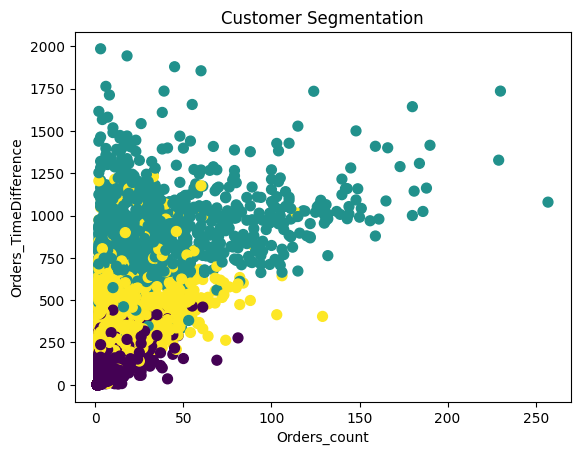

In [ ]:
# Add cluster labels to the data
train_df1['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(train_df1['Orders_count'], train_df1['Orders_TimeDifference'], c=train_df1['Cluster'], s=50)
plt.xlabel('Orders_count')
plt.ylabel('Orders_TimeDifference')
plt.title('Customer Segmentation')
plt.show()

In [ ]:
# Analyze the clusters
train_df1.groupby('Cluster').agg({
    'Orders_count': 'mean',
    'Orders_TimeDifference': 'mean',
    'MailClicked_yes':'mean',
    'TimeDifference':'mean',
    'EmailType_CustomizedEmail':'mean'
})

,Orders_count,Orders_TimeDifference,MailClicked_yes,TimeDifference,EmailType_CustomizedEmail
Cluster,,,,,
0,1.973080,18.533174,0.966973,27.664892,17.494577
1,35.020426,896.994671,3.169627,993.175844,44.491119
2,11.202606,306.194969,2.012579,422.230009,38.488769


In [ ]:
# Compute the purity score
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    confusion_mat = confusion_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(confusion_mat, axis=0)) / np.sum(confusion_mat)

purity = purity_score(y_true, kmeans.labels_)
print(f"The purity score is {round(purity*100, 2)}%")

The purity score is 80.54%


In [ ]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score for k-means clustering
silhouette_avg = silhouette_score(train_df1, kmeans.labels_)

# Print the silhouette score
print("The silhouette score is :", silhouette_avg)

The silhouette score is : 0.7542652655985976


In [ ]:
train_df1.head()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,Cluster
0,1.0,0,0,0,1.0,2012,9,28,29,30,0,1,300,0,15.000000,1,0
1,1.0,1,1,1,0.0,2010,12,19,95,89,7,10,1096,1024,83.946237,186,1
2,1.0,0,0,0,6.0,2010,10,3,0,1,0,0,0,217,34.076923,13,0
3,3.0,0,0,0,1.0,2010,11,27,30,28,3,4,751,791,106.857143,7,1
4,1.0,1,1,0,0.0,2009,12,4,64,19,46,10,1504,848,69.117647,34,1


In [ ]:
cluster_0 = train_df1[train_df1['Cluster']==0]
cluster_0

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,Cluster
0,1.0,0,0,0,1.0,2012,9,28,29,30,0,1,300,0,15.000000,1,0
2,1.0,0,0,0,6.0,2010,10,3,0,1,0,0,0,217,34.076923,13,0
15,3.0,0,0,0,1.0,2011,2,22,0,1,0,0,0,0,30.000000,1,0
19,1.0,0,0,0,5.0,2011,1,26,18,1,18,0,187,50,85.500000,4,0
22,1.0,0,0,0,5.0,2010,8,28,16,1,16,0,269,28,75.500000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23815,1.0,1,1,0,0.0,2018,1,17,0,1,0,0,0,0,41.000000,1,0
23816,2.0,1,0,1,0.0,2018,1,17,0,1,0,0,0,0,56.000000,1,0
23817,2.0,1,0,0,2.0,2018,1,17,0,1,0,0,0,0,35.000000,1,0
23818,2.0,1,1,0,2.0,2018,1,17,8,7,2,3,4,4,50.000000,2,0


In [ ]:
cluster_0.describe()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,Cluster
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0
mean,2.009478,0.718194,0.097225,0.036740,3.089848,2013.392711,8.139828,15.307114,17.494577,5.236711,13.257866,0.966973,27.664892,18.533174,58.878277,1.973080,0.0
std,0.938114,0.449890,0.296271,0.188128,2.231593,1.868096,3.158024,8.554532,18.778287,7.187649,16.268655,2.067764,50.262556,46.039556,36.429612,2.932809,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0
25%,1.000000,0.000000,0.000000,0.000000,1.000000,2013.000000,6.000000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,41.000000,1.000000,0.0
50%,2.000000,1.000000,0.000000,0.000000,4.000000,2013.000000,9.000000,15.000000,8.000000,1.000000,1.000000,0.000000,1.000000,0.000000,49.000000,1.000000,0.0
75%,3.000000,1.000000,0.000000,0.000000,5.000000,2013.000000,10.000000,22.000000,37.000000,7.000000,28.000000,1.000000,33.000000,10.000000,68.000000,2.000000,0.0
max,3.000000,1.000000,1.000000,1.000000,6.000000,2018.000000,12.000000,31.000000,123.000000,58.000000,91.000000,36.000000,342.000000,467.000000,1501.000000,81.000000,0.0


In [ ]:
cluster_1 = train_df1[train_df1['Cluster']==1]
cluster_1

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,Cluster
1,1.0,1,1,1,0.0,2010,12,19,95,89,7,10,1096,1024,83.946237,186,1
3,3.0,0,0,0,1.0,2010,11,27,30,28,3,4,751,791,106.857143,7,1
4,1.0,1,1,0,0.0,2009,12,4,64,19,46,10,1504,848,69.117647,34,1
5,1.0,1,0,0,1.0,2010,12,29,34,33,2,3,1072,1024,65.788321,137,1
6,1.0,0,0,1,0.0,2010,9,22,48,41,8,1,1210,1154,86.740000,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21342,1.0,1,0,0,4.0,2014,11,23,6,6,1,1,840,1017,114.285714,28,1
21356,3.0,0,1,0,1.0,2015,5,14,49,48,2,7,964,844,49.181818,33,1
23512,1.0,0,0,0,1.0,2015,3,26,16,12,5,0,1008,461,135.000000,16,1
23579,3.0,1,1,0,0.0,2015,1,29,13,11,3,4,1043,574,50.000000,10,1


In [ ]:
cluster_1.describe()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,Cluster
count,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.000000,1126.0
mean,1.687389,0.381883,0.088810,0.030195,2.950266,2011.141208,6.645648,15.435169,44.491119,14.736234,30.754885,3.169627,993.175844,896.994671,85.194565,35.020426,1.0
std,0.946554,0.486064,0.284596,0.171201,2.259442,1.776025,3.259122,8.551063,15.108244,15.190075,16.370389,4.074921,270.791110,243.446286,46.195491,37.891688,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.444444,1.000000,1.0
25%,1.000000,0.000000,0.000000,0.000000,1.000000,2010.000000,4.000000,8.000000,41.000000,4.000000,17.250000,0.000000,792.000000,747.250000,55.770833,8.000000,1.0
50%,1.000000,0.000000,0.000000,0.000000,4.000000,2011.000000,7.000000,15.000000,46.000000,11.000000,35.000000,2.000000,948.500000,875.000000,76.000000,21.000000,1.0
75%,3.000000,1.000000,0.000000,0.000000,5.000000,2011.000000,9.000000,23.000000,50.000000,23.000000,44.000000,4.000000,1144.750000,1021.000000,103.000000,48.000000,1.0
max,3.000000,1.000000,1.000000,1.000000,6.000000,2016.000000,12.000000,31.000000,291.000000,256.000000,73.000000,42.000000,1989.000000,1985.000000,657.272727,257.000000,1.0


In [ ]:
cluster_2 = train_df1[train_df1['Cluster']==2]
cluster_2

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,Cluster
16,1.0,0,0,0,6.0,2010,12,18,47,2,46,0,572,577,78.250000,4,2
17,1.0,1,0,0,6.0,2010,8,12,47,10,38,5,980,252,114.657143,35,2
18,1.0,0,0,0,5.0,2011,3,10,0,1,0,0,0,570,78.000000,4,2
23,3.0,0,0,0,5.0,2011,1,29,45,6,40,0,561,0,61.000000,1,2
26,1.0,0,0,0,4.0,2010,5,18,45,9,37,1,659,645,117.523810,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21197,2.0,0,0,0,4.0,2016,12,6,41,28,14,4,379,30,27.333333,3,2
21223,3.0,1,0,0,1.0,2016,12,15,56,20,37,0,382,331,69.918033,61,2
21585,3.0,1,0,0,0.0,2015,8,10,37,18,20,5,887,119,117.000000,10,2
22510,1.0,0,0,0,5.0,2014,4,16,31,3,29,0,1203,17,83.500000,2,2


In [ ]:
cluster_2.describe()

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,Cluster
count,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.000000,2226.0
mean,1.912848,0.269991,0.074573,0.049416,3.079066,2012.277179,6.402516,16.691375,38.488769,10.818509,28.670261,2.012579,422.230009,306.194969,79.646257,11.202606,2.0
std,0.972681,0.444055,0.262760,0.216784,2.250801,1.938838,3.201639,8.956950,15.583227,10.861801,16.553732,3.098216,220.629197,219.470594,42.373059,14.082512,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.0
25%,1.000000,0.000000,0.000000,0.000000,1.000000,2011.000000,4.000000,9.000000,35.000000,2.000000,16.000000,0.000000,279.250000,155.000000,52.255208,3.000000,2.0
50%,2.000000,0.000000,0.000000,0.000000,4.000000,2012.000000,7.000000,16.000000,44.000000,7.000000,33.000000,1.000000,400.000000,287.000000,69.675000,6.000000,2.0
75%,3.000000,1.000000,0.000000,0.000000,5.000000,2013.000000,9.000000,25.000000,47.000000,17.000000,43.000000,3.000000,535.750000,449.000000,94.992424,13.000000,2.0
max,3.000000,1.000000,1.000000,1.000000,6.000000,2017.000000,12.000000,31.000000,101.000000,62.000000,72.000000,27.000000,1320.000000,1230.000000,536.810811,129.000000,2.0


# Read Test Data

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/CAPSTONE/Test/Customer_segmentation_test.csv')

In [ ]:
test_df.head()

,CustomerID,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count
0,C17838,3.0,0,0,0,4.0,2010,10,22,0,1,0,0,0,0,55.000000,1
1,C12403,1.0,1,1,0,6.0,2008,11,17,46,38,9,7,1868,1190,175.815476,168
2,C19041,3.0,0,1,0,0.0,2011,1,24,60,27,34,4,1072,976,117.385246,122
3,C24069,1.0,0,0,0,6.0,2010,9,18,45,1,45,0,51,0,47.000000,1
4,C26718,1.0,1,0,0,1.0,2010,10,2,13,9,5,2,1198,1083,156.883721,129


In [ ]:
test_df1 = test_df.drop('CustomerID', axis=1)

## Predictions

In [ ]:
# Predict cluster labels for the test data
y_pred = kmeans.predict(test_df1)

In [ ]:
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Create a new column in the test data with the predicted cluster labels
test_df1['Cluster'] = y_pred

In [ ]:
test_df1

,City,OnlineCommunication,AutomaticRefill,DoorstepDelivery,PreferredDeliveryDay,DateOfRegistration_Year,DateOfRegistration_Month,DateOfRegistration_Day,EmailType_CustomizedEmail,MailOpened_yes,MailOpened_no,MailClicked_yes,TimeDifference,Orders_TimeDifference,OrderQuantity_mean,Orders_count,Cluster
0,3.0,0,0,0,4.0,2010,10,22,0,1,0,0,0,0,55.000000,1,0
1,1.0,1,1,0,6.0,2008,11,17,46,38,9,7,1868,1190,175.815476,168,1
2,3.0,0,1,0,0.0,2011,1,24,60,27,34,4,1072,976,117.385246,122,1
3,1.0,0,0,0,6.0,2010,9,18,45,1,45,0,51,0,47.000000,1,0
4,1.0,1,0,0,1.0,2010,10,2,13,9,5,2,1198,1083,156.883721,129,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,1.0,1,0,0,0.0,2018,1,17,0,1,0,0,0,0,41.000000,1,0
5951,2.0,1,0,0,0.0,2018,1,17,0,1,0,0,0,0,40.000000,1,0
5952,2.0,1,0,0,1.0,2018,1,17,0,1,0,0,0,0,36.000000,1,0
5953,1.0,1,0,0,0.0,2018,1,17,0,1,0,0,0,0,75.000000,1,0


In [ ]:
# View the cluster labels
print(test_df1['Cluster'].value_counts())

0    5144
2     530
1     281
Name: Cluster, dtype: int64


## Cluster Visualization

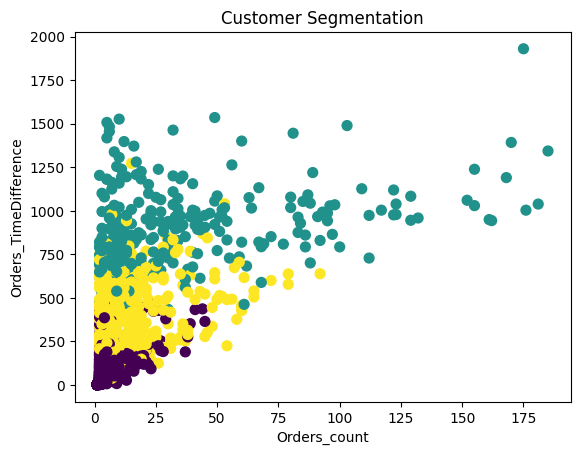

In [ ]:
# Visualize the clusters
plt.scatter(test_df1['Orders_count'], test_df1['Orders_TimeDifference'], c=test_df1['Cluster'], s=50)
plt.xlabel('Orders_count')
plt.ylabel('Orders_TimeDifference')
plt.title('Customer Segmentation')
plt.show()